In [1]:
import matplotlib.pyplot as plt
import numpy as np


## Applying SOM into Mnist data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train_origin = y_train

width,height=20,20
k = np.random.random(size=28*28*width*height)*256
k = k.reshape(width,height,28,28)
eta = 0.1


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
x_train[1]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

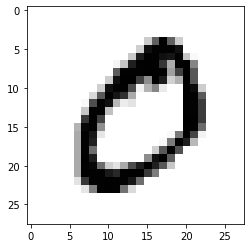

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1].astype(int),cmap=plt.get_cmap('gray_r'))
plt.show()

In [14]:
import random

for i in range(200000):
  x_id = (int)(random.random()*len(x_train))
  d=np.asarray([np.sum((x_train[x_id]-k[i][j])**2) for i in range(width) for j in range(height)])
  winner = np.argmin(d)
  w = winner//width,winner%width
  k[w[0],w[1]] = k[w[0],w[1]]+eta*(x_train[x_id]-k[w[0],w[1]])
  eta_n = eta*0.3
  if w[0]-1 >= 0:
      k[w[0]-1,w[1]] = k[w[0]-1,w[1]]+eta_n*(x_train[x_id]-k[w[0]-1,w[1]])
  if w[0]+1 < width:
      k[w[0]+1,w[1]] = k[w[0]+1,w[1]]+eta_n*(x_train[x_id]-k[w[0]+1,w[1]])
  if w[1]-1 >= 0:
      k[w[0],w[1]-1] = k[w[0],w[1]-1]+eta_n*(x_train[x_id]-k[w[0],w[1]-1])
  if w[1]+1 < height:
      k[w[0],w[1]+1] = k[w[0],w[1]+1]+eta_n*(x_train[x_id]-k[w[0],w[1]+1])
  if(i%1000 == 0):
      print('.',end='')

.

In [15]:
new_x_train = []

for ii in range(len(x_train)):
  d=np.asarray([np.sum((x_train[ii]-k[i][j])**2) for i in range(width) for j in range(height)])
  winner = np.argmin(d)
  w = winner//width,winner%width
  new_x_train.append([w[0],w[1]])

new_x_train = np.array(new_x_train)

In [6]:
new_x_train[:10]

[[1, 15],
 [18, 11],
 [13, 8],
 [7, 17],
 [10, 2],
 [4, 6],
 [10, 19],
 [12, 17],
 [8, 19],
 [5, 4]]

In [7]:
new_x_test = []

for ii in range(len(x_test)):
  d=np.asarray([np.sum((x_test[ii]-k[i][j])**2) for i in range(width) for j in range(height)])
  winner = np.argmin(d)
  w = winner//width,winner%width
  new_x_test.append([w[0],w[1]])

new_x_test = np.array(new_x_test)

In [8]:
import pandas as pd

df=pd.DataFrame(columns=['id','i','j','class'])

for i in range(len(new_x_train)):
  rec = dict()
  rec['id'] = i
  rec['i'] = new_x_train[i][0]
  rec['j'] = new_x_train[i][1]
  rec['class'] = y_train_origin[i]
  df=df.append(rec,ignore_index=True)

df.to_csv('som_out.csv')

In [9]:
df.head()

,id,i,j,class
0,0,1,15,5
1,1,18,11,0
2,2,13,8,4
3,3,7,17,1
4,4,10,2,9


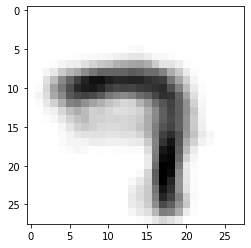

In [10]:
import matplotlib.pyplot as plt

plt.imshow(k[13][6].astype(int),cmap=plt.get_cmap('gray_r'))
plt.show()

# CNN

In [11]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [16]:
batch_size = 500
num_classes = 10
epochs = 500

model = Sequential()
model.add(Dense(2, activation='linear'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(new_x_train,y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_split=0.1)
score = model.evaluate(new_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.625930666923523
Test accuracy: 0.4894999861717224
